# Milestone P2

[Milestone P2 briefing](https://epfl-ada.github.io/teaching/fall2023/cs401/projects/#p2-project-proposal-and-initial-analyses)

Goals: acquaint ourselves with the data, preprocess the data, complete all the necessary descriptive statistics tasks

Should contain (non-exhaustive):
- That you can handle the data in its size.
- That you understand what’s in the data (formats, distributions, missing values, correlations, etc.).
- That you considered ways to enrich, filter, transform the data according to your needs.
- That you have a reasonable plan and ideas for methods you’re going to use, giving their essential mathematical details in the notebook.
- That your plan for analysis and communication is reasonable and sound, potentially discussing alternatives to your choices that you considered but dropped.
... initial analyses and data handling pipelines.

Grade: correctness, quality of code, and quality of textual descriptions
(20% of the project grade)

## Configuration

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ast

from implementations import data_viz, data_missing, data_format, data_clean, data_filter

In [2]:
# Data Path
DATA_PATH = '../data/'
MOVIES_FOLDER = DATA_PATH+'MovieSummaries/'
MOVIES_DATASET = MOVIES_FOLDER+"movie.metadata.tsv"

# Load Data
df = pd.read_csv(MOVIES_DATASET, sep='\t', names=['id_wiki','id_freebase','name','date',
                                                  'box_office','runtime','lang','countries','genres'])

## What's in the data?
Description and visualization of the data:
- data type, formats (explain type for each feature)
- distributions
- missing values
- correlation
- ... ?

Size Movies 81741


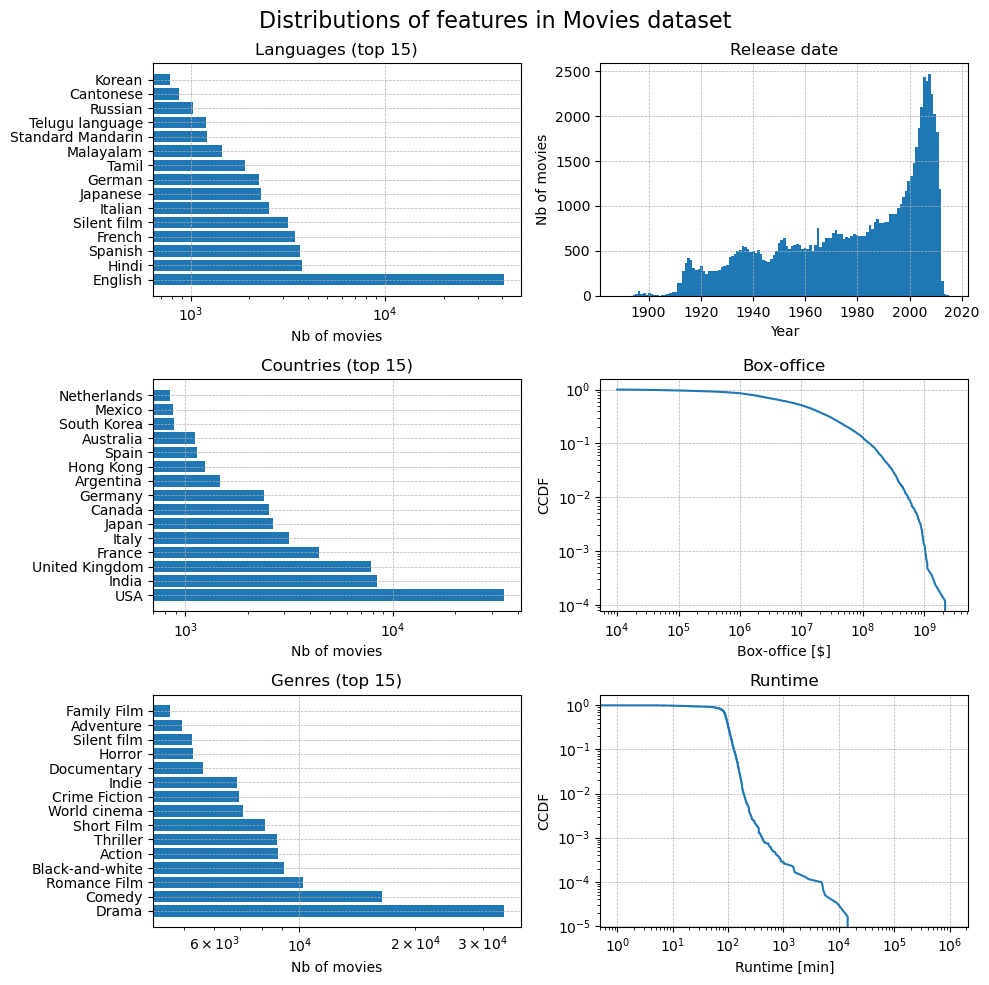

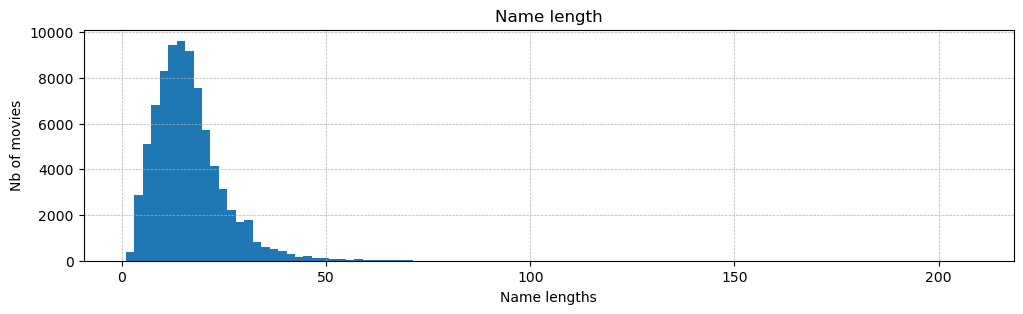

In [3]:
print("Size Movies", len(df))
data_viz(df)

## Enrich Data
- filter
- transform data according to our needs
- new datasets

How data description changed from raw data ?

In [4]:
movies = df.copy()

# Handle missing values
movies = data_missing(movies)

# Format data types
movies = data_format(movies)

# Clean data, outliers and features
movies = data_clean(movies)

# Filter data
movies = data_filter(movies)

In [5]:
print("Size Movies (filtered)", len(movies))
# data_viz(movies)

Size Movies (filtered) 8328


## Pipeline
Our ideas and structure to solve the problem. Reasonable plan, discuss alternatives, dropped ideas.

1. Plot subsets (genres, etc.)
2. Range prior to a trend peak
3. Algo for pivotal movie (box-office, reviews, summary similarites)

Example: Teen movies

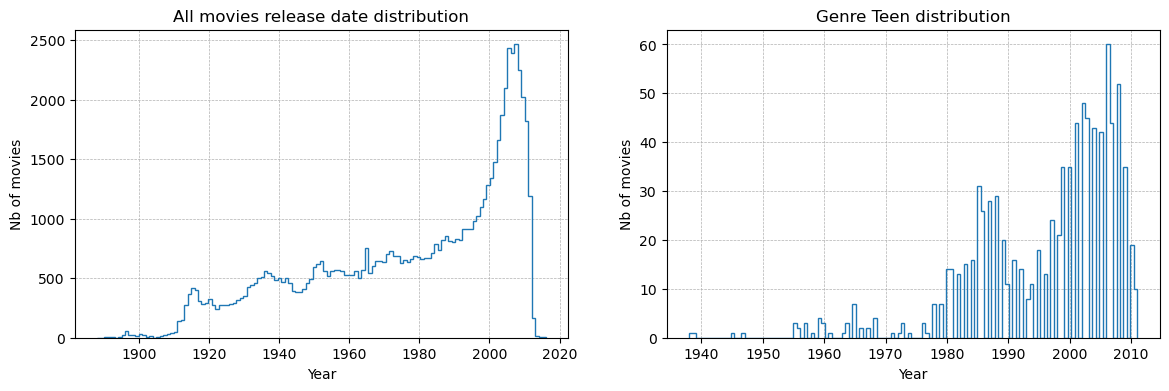

In [9]:
# example of the pipeline for subset Teen movies
# c'est moche et redondant, il faut clean le code

m2 = df.copy()
m2['genres'] = m2.dropna(subset=['genres'])['genres'].apply(lambda x: ast.literal_eval(x)).apply(lambda x: list(x.values()))

search_g = 'Teen'
m2_drama = m2[m2.genres.apply(lambda x: search_g in x)]
m2_drama_year = m2_drama.dropna(subset=['date'])['date']
# Process dates like: yyyy-mm and yyyy-mm-dd
m2_drama_year = m2_drama_year.str.replace(r'-\d{2}-\d{2}$', '', regex=True)
m2_drama_year = m2_drama_year.str.replace(r'-\d{2}$', '', regex=True)
# Convert data type to int
m2_drama_year = m2_drama_year.astype(int)
# Drop outliers
m2_drama_year = m2_drama_year.drop(m2_drama_year.index[m2_drama_year<1800])

# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(14,4))
axs = axs.ravel()

from implementations import process_year
movies_year = process_year(df)
movies_year.hist(bins=movies_year.nunique(), histtype='step', ax=axs[0])
axs[0].set_xlabel('Year')
axs[0].set_ylabel('Nb of movies')
axs[0].set_title('All movies release date distribution')
axs[0].grid(linestyle='--', linewidth=0.5)

m2_drama_year.hist(bins=movies_year.nunique(), histtype='step', ax=axs[1])
axs[1].set_xlabel('Year')
axs[1].set_ylabel('Nb of movies')
axs[1].set_title('Genre {} distribution'.format(search_g))
axs[1].grid(linestyle='--', linewidth=0.5)
